In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
faces = fetch_olivetti_faces()

In [3]:
data = faces.data  #存储像素数据
images=faces.images #存储二维图像矩阵

In [6]:
images.shape

(400, 64, 64)

In [7]:
data.shape

(400, 4096)

In [4]:
import matplotlib.pyplot as plt

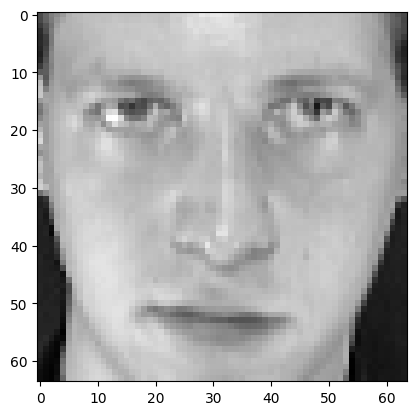

In [5]:
plt.imshow(images[2],cmap='gray')

In [9]:
#导包
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge

# 左右两边脸

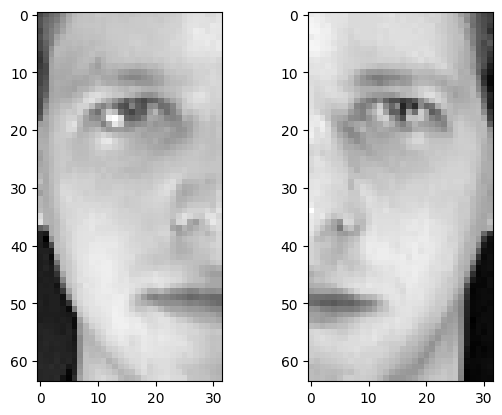

In [14]:
left_faces = images[:,:,:32]
right_faces = images[:,:,32:]
plt.subplot(1,2,1)
plt.imshow(left_faces[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(right_faces[0],cmap='gray')

# 使用左右两边脸，训练模型

In [15]:
X_train,X_test,y_train,y_test = train_test_split(left_faces.reshape(400,-1),right_faces.reshape(400,-1),test_size=0.2)

In [16]:
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_pre = linear.predict(X_test)
linear_score = linear.score(X_test,y_test)
linear_score

0.2386123389005661

In [17]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
ridge_pre = ridge.predict(X_test)
ridge_score = ridge.score(X_test,y_test)
ridge_score

0.24705588817596436

In [18]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
lasso_pre = lasso.predict(X_test)
lasso_score = lasso.score(X_test,y_test)
lasso_score

0.12546269595623016

In [20]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn_pre = knn.predict(X_test)
knn_score = knn.score(X_test,y_test)
knn_score

0.5011241436004639

In [21]:
y_pre = {'linear_pre':linear_pre,'ridge_pre':ridge_pre,'lasso_pre':lasso_pre,'knn_pre':knn_pre}

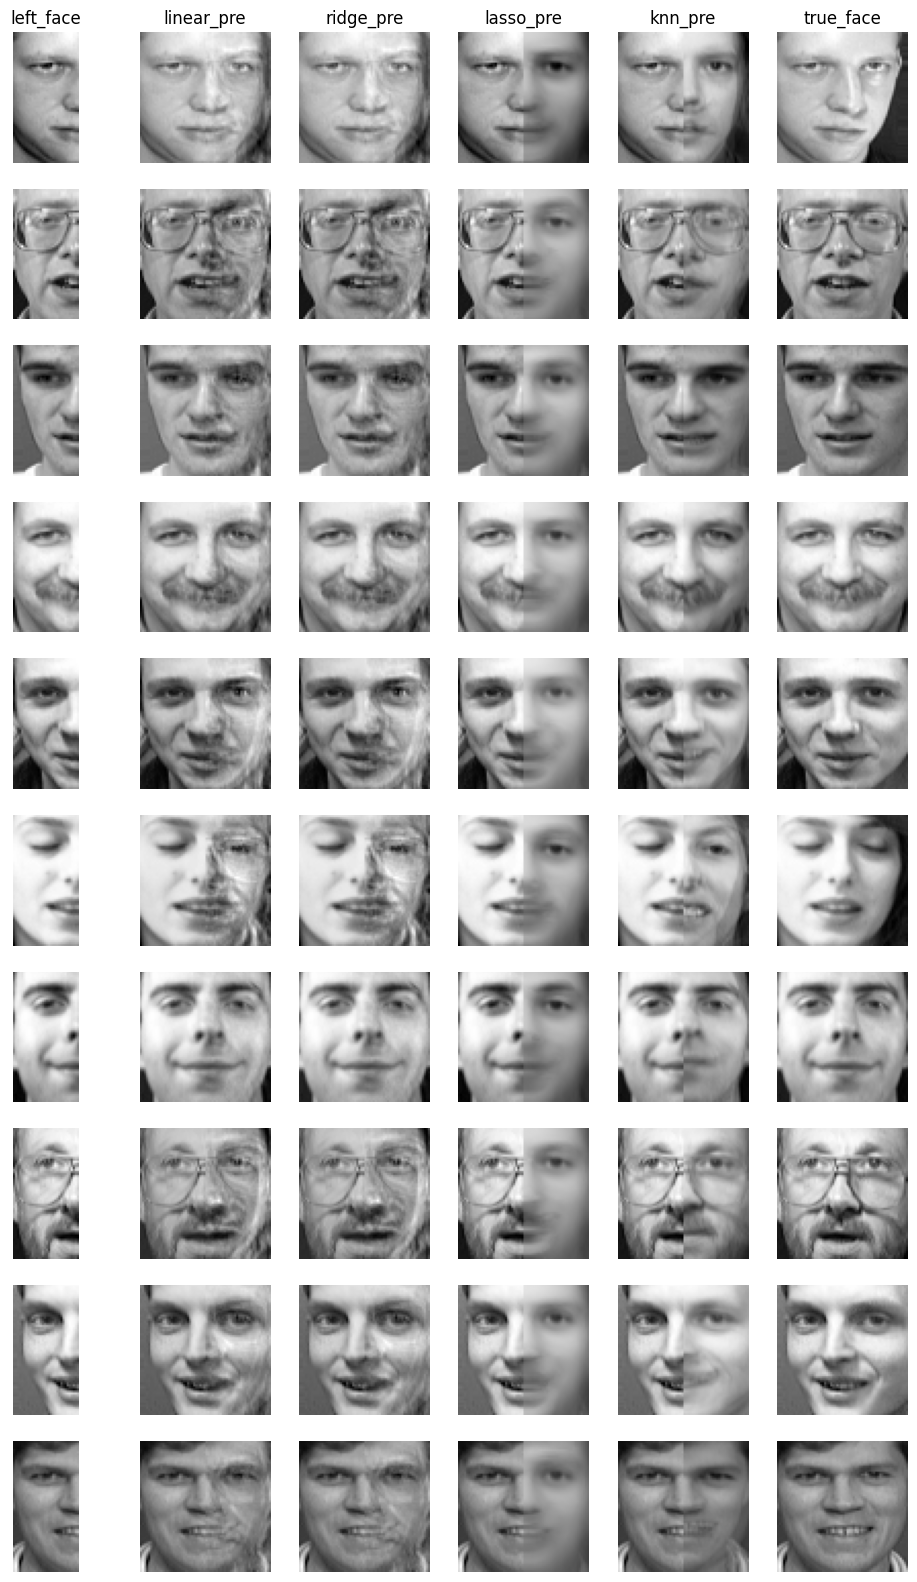

In [29]:
import numpy as np
plt.figure(figsize=(6*2,10*2))

for i in range(0,10):
    axes = plt.subplot(10,6,i*6+1)
    left_face = X_test[i].reshape(64,32)
    axes.imshow(left_face,cmap='gray')
    axes.axis('off')
    if i == 0:
        axes.set_title('left_face')

    axes = plt.subplot(10,6,i*6+6)
    turn_face = np.hstack((X_test[i].reshape(64,32),y_test[i].reshape(64,32)))
    axes.imshow(turn_face,cmap='gray')
    axes.axis('off')
    if i == 0:
        axes.set_title('true_face')

    for j,key in enumerate(y_pre):
        axes = plt.subplot(10,6,i*6+2+j)
        y1 = y_pre[key]
        predict_right_face = y1[i].reshape(64,32)
        predict_face = np.hstack((left_face,predict_right_face))
        axes.imshow(predict_face,cmap='gray')
        axes.axis('off')
        if i == 0 :
            axes.set_title(key)

# 上下边脸

In [30]:
top_data = data[:,:2048]
low_data = data[:,2048:]

In [32]:
X_train,X_test,y_train,y_test = train_test_split(top_data,low_data,test_size=0.2)

In [33]:
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_pre = linear.predict(X_test)
linear_score = linear.score(X_test,y_test)
linear_score

0.12091420590877533

Text(0.5, 1.0, '真实')

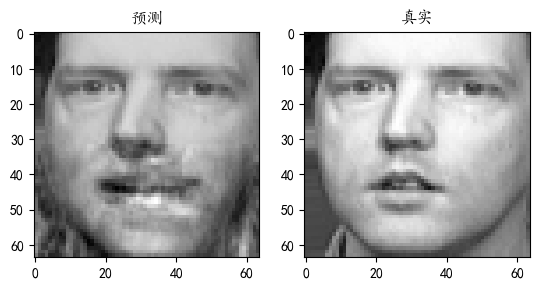

In [36]:
#画出预测的脸
plt.rcParams['font.sans-serif'] = 'KaiTi'
plt.subplot(121)
plt.imshow(np.hstack((X_test,linear_pre))[0].reshape(64,64),cmap='gray')
plt.title('预测')
plt.subplot(122)
plt.imshow(np.hstack((X_test,y_test))[0].reshape(64,64),cmap='gray')
plt.title('真实')

In [37]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge_pre = ridge.predict(X_test)
ridge_score = ridge.score(X_test,y_test)
ridge_score

0.2296481430530548

Text(0.5, 1.0, '真实')

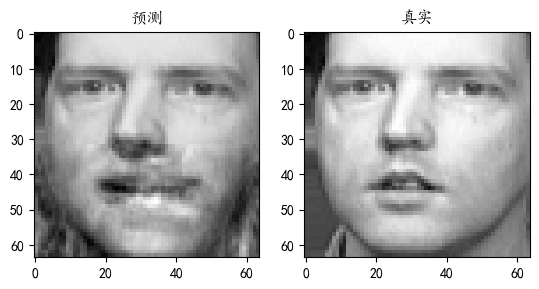

In [39]:
plt.rcParams['font.sans-serif'] = 'KaiTi'
plt.subplot(121)
plt.imshow(np.hstack((X_test,ridge_pre))[0].reshape(64,64),cmap='gray')
plt.title('预测')
plt.subplot(122)
plt.imshow(np.hstack((X_test,y_test))[0].reshape(64,64),cmap='gray')
plt.title('真实')

In [40]:
# lasso回归
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
lasso_pre = lasso.predict(X_test)
lasso_score = lasso.score(X_test,y_test)
lasso_score

0.4811048209667206

Text(0.5, 1.0, '真实')

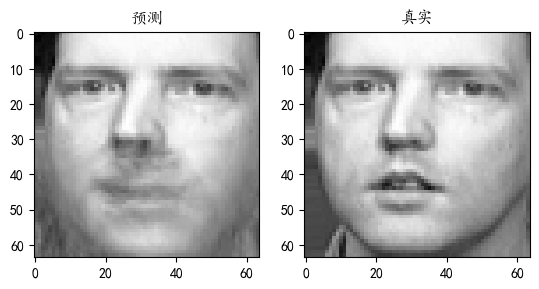

In [41]:
plt.rcParams['font.sans-serif'] = 'KaiTi'
plt.subplot(121)
plt.imshow(np.hstack((X_test,lasso_pre))[0].reshape(64,64),cmap='gray')
plt.title('预测')
plt.subplot(122)
plt.imshow(np.hstack((X_test,y_test))[0].reshape(64,64),cmap='gray')
plt.title('真实')

In [42]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn_pre = knn.predict(X_test)
knn_score = knn.score(X_test,y_test)
knn_score

0.4871428906917572

Text(0.5, 1.0, '真实')

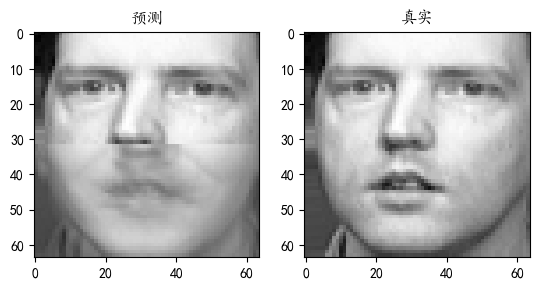

In [43]:
plt.rcParams['font.sans-serif'] = 'KaiTi'
plt.subplot(121)
plt.imshow(np.hstack((X_test,knn_pre))[0].reshape(64,64),cmap='gray')
plt.title('预测')
plt.subplot(122)
plt.imshow(np.hstack((X_test,y_test))[0].reshape(64,64),cmap='gray')
plt.title('真实')

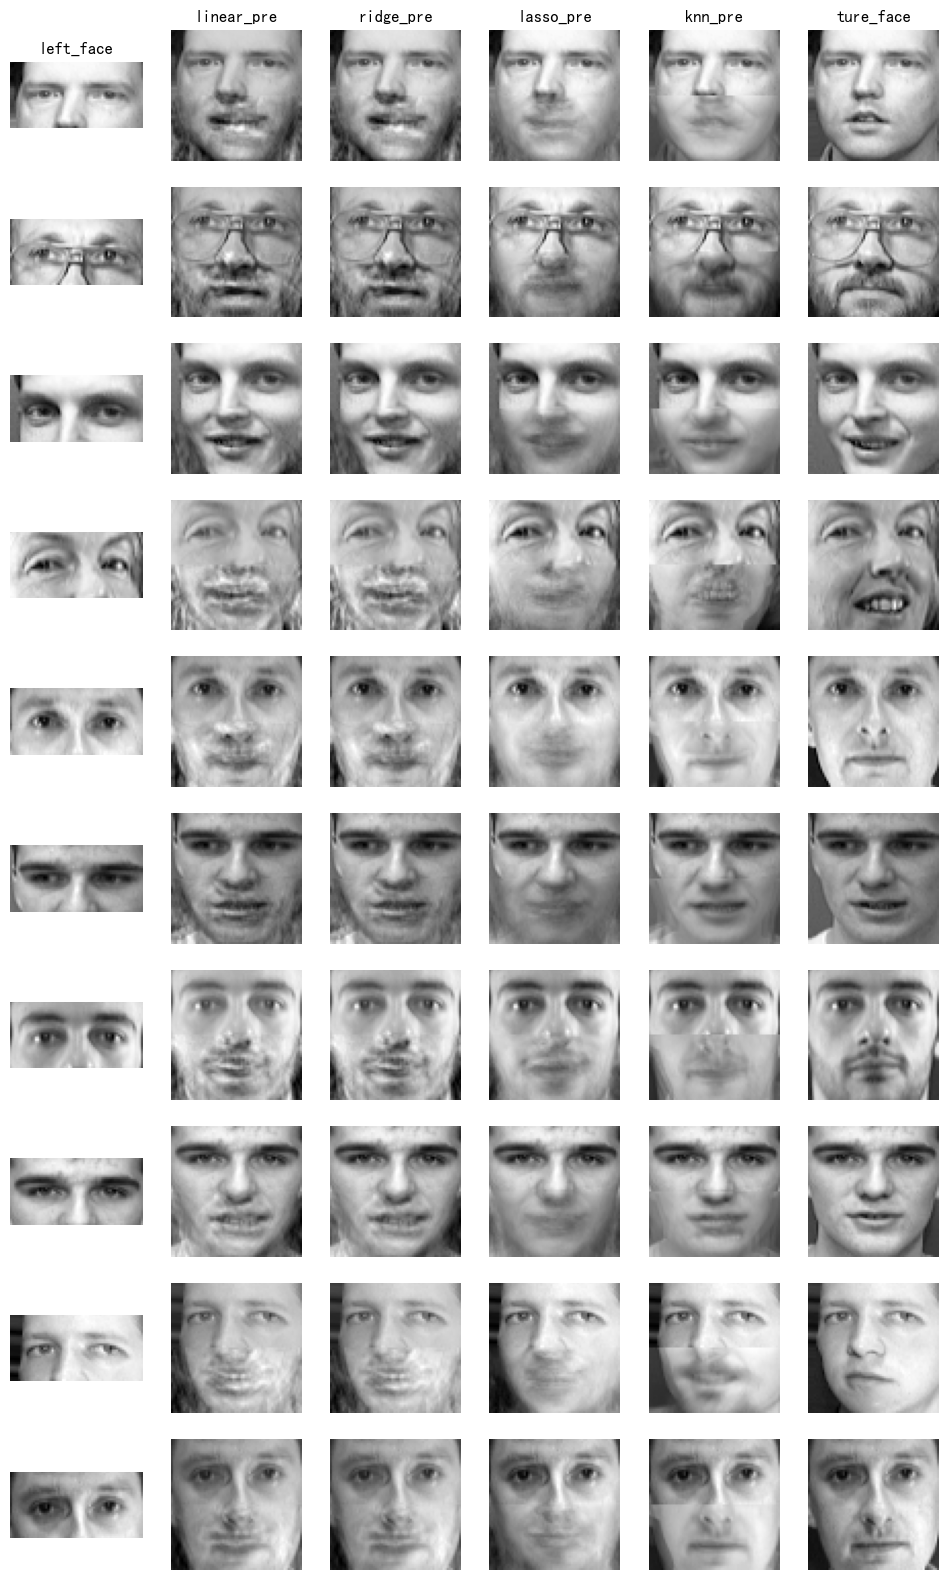

In [47]:
y_pre = {'linear_pre':linear_pre,'ridge_pre':ridge_pre,'lasso_pre':lasso_pre,'knn_pre':knn_pre}
plt.figure(figsize=(6*2,10*2))
for i in range(0,10):
    axes = plt.subplot(10,6,i*6+1)
    up_face = X_test[i].reshape(32,64) #获取数据并恢复尺寸
    axes.imshow(up_face,cmap='gray')
    axes.axis('off')
    if i==0:
        axes.set_title('left_face')

    axes = plt.subplot(10,6,i*6+6)
    true_face = np.vstack((X_test[i].reshape(32,64),y_test[i].reshape(32,64)))
    axes.imshow(true_face,cmap='gray')
    axes.axis('off')
    if i == 0:
        axes.set_title('ture_face')
    #同时返回索引j和模型名称key
    for j,key in enumerate(y_pre):
        axes = plt.subplot(10,6,i*6+2+j)
        y1 = y_pre[key]
        predict_down_face = y1[i].reshape(32,64)
        predict_face = np.vstack((up_face,predict_down_face))
        axes.imshow(predict_face,cmap='gray')
        axes.axis('off')
        if i == 0 :
            axes.set_title(key)